# Machine Learning Topics Iam covering in this notebook.

* Basics of Data Mining: dimensionality reduction
* Principal Component Analysis (PCA)
* Linear Discriminant Analysis (LDA)
* Regression analysis
* k-Nearest Neighbors algorithm (K-NN)
* Random forest
* Linear regression 
* Support Vector Machine (SVM)
* Decision trees
* Heat-Maps
* Hierarchical clustering
* Training and Testing The Data
* label Encoding
* Naïve Bayes Classifier Algorithm
* K-Means Clustering(Elbow Plot Method)
* K-Folds cross-validation
* Building confusion_matrix

# Importing the dependencies

In [1]:
# To filter the warnings.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd # To Read the datasets.
import numpy as np

# For Data visualization.
# The Finding of trends and correlations in our data by representing it pictorially is called Data visualizations.
import matplotlib.pyplot as plt
import seaborn as sns

# To Load the datasets from sklearn library.
from sklearn import datasets

from sklearn.metrics import confusion_matrix # To Build confusion matrix.
from sklearn.metrics import classification_report # To Get the precision , recall , f1-scores.
from sklearn.preprocessing import LabelEncoder # converting the labels into a numeric form. 
from sklearn.model_selection import cross_val_score # To Evaluate the  Best Model. 

#To calculate the mean intra-cluster distance & the mean nearest-cluster distance. 
from sklearn.metrics import silhouette_score 
import scipy.cluster .hierarchy as sch # To construct Dendrograms

# Standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler #Transform features by scaling each feature to a given range.

# To split the data into training and testing data
from sklearn.model_selection import train_test_split



# Different types of classifiers I used.
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Principal Component Analysis (PCA)
* The Principal Component Analysis is a popular unsupervised learning technique for reducing the dimensionality of data.
* It increases interpretability yet, at the same time, it minimizes information loss.
* It helps to find the most significant features in a dataset and makes the data easy for plotting in 2D and 3D.


In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
# Creating a Data Frame
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
x=df
y= cancer.target

In [224]:
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Data Standardization

In [226]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [227]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler()

In [284]:
scaled_data = scaler.transform(x)

In [285]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [266]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data,y,test_size=0.2,random_state=2)

In [267]:
from sklearn.linear_model import LogisticRegression

model = LinearRegression()
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.713106702018627

In [268]:
from sklearn.decomposition import PCA

# Reducing 30 Dimenctions to 2 Dimenction

* Reducing the dimensionality of data.

In [269]:
pca=PCA(n_components=2)

In [270]:
pca.fit(x)

PCA(n_components=2)

In [271]:
x_pca = pca.transform(x)

In [272]:
x.shape

(569, 30)

In [273]:
x_pca.shape

(569, 2)

In [274]:
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [275]:
x_pca

array([[-1097.34141723,  -106.02736969],
       [-1097.07646801,  -105.18092119],
       [-1097.61455356,  -105.26667341],
       ...,
       [-1099.12860781,  -105.66143748],
       [-1097.28553285,  -105.22762792],
       [-1101.66041373,  -106.69219745]])

In [276]:
pca.explained_variance_ratio_

array([0.98204467, 0.01617649])

In [277]:
pca.n_components_

2

In [296]:
 x_train,x_test,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=2)

# LinearDiscriminantAnalysis

In [297]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [298]:
model = LinearDiscriminantAnalysis()
model.fit(x_train,y_train)

LinearDiscriminantAnalysis()

In [305]:
model.score(x_test,y_test)

0.8859649122807017

Text(0, 0.5, 'second principle component')

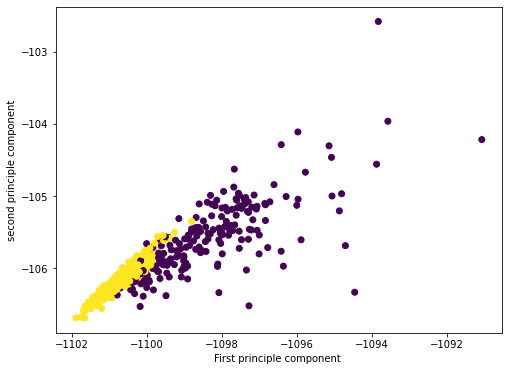

In [303]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'])
plt.xlabel("First principle component ")
plt.ylabel("second principle component")

# LinearRegression
* LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the datasets.
* the targets predicted by the linear approximation.
* Linear Regression Linear Regression is a machine learning algorithm based on supervised learning.
* It performs a regression task. Regression models a target prediction value based on independent variables.
* It is mostly used for finding out the relationship between variables and forecasting

# Training and Testing The Data(LinearRegression)
How to use train_test_split Method using LinearRegressionClassifier

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [28]:
df= pd.read_csv("carprices.csv")
df.head(5)

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


# Data preprocessing separating the futures and targets

In [31]:
x = df.drop(columns=['Sell Price($)'],axis=1)
y = df['Sell Price($)']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
print(x.shape, x_train.shape, x_test.shape)

(20, 2) (16, 2) (4, 2)


In [13]:
len(x_train)

16

In [14]:
len(x_test)

4

In [15]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [16]:
clf.fit(x_train,y_train)

LinearRegression()

In [17]:
clf.predict(x_test) 

array([25732.02824114, 30302.91620804, 15786.6597107 , 22247.86009258])

In [19]:
clf.score(x_test,y_test)

0.8623792037791014

#  Spport Vector Machine
* The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.
* SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors, and hence algorithm is termed as Support Vector Machine

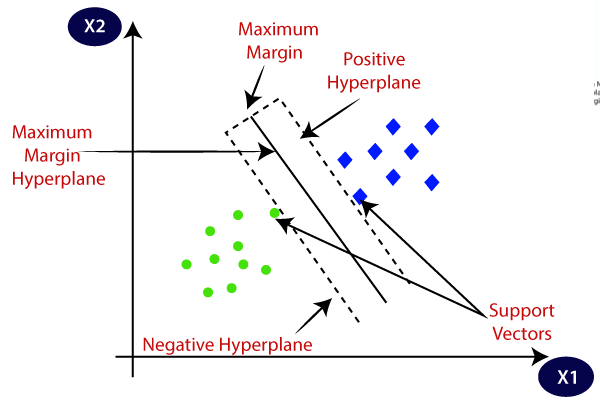


In [174]:
from sklearn.datasets import load_iris
iris = load_iris()

In [175]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [176]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [177]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [178]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [179]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [180]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [181]:
df['flower_name'] = df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [182]:
%matplotlib inline

In [183]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2] 

# sepal length vs sepal width

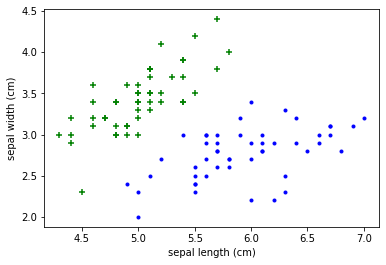

In [185]:
plt.xlabel('sepal length (cm)') 
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='.')


# petal length vs petal width

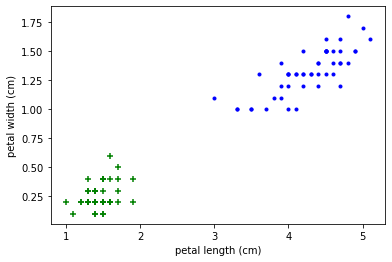

In [186]:
plt.xlabel('petal length (cm)') 
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='.')


In [187]:
# splitting the data futures and targets

In [188]:
x = df.drop(columns=['target','flower_name'], axis=1)
y = df['target']

In [191]:
from sklearn.model_selection import train_test_split

In [192]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=2)

In [193]:
print(x.shape, x_train.shape, x_test.shape)

(150, 4) (120, 4) (30, 4)


In [194]:
from sklearn.svm import SVC

In [195]:
model = SVC()

In [196]:
model.fit(x_train,y_train)

SVC()

In [197]:
model.score(x_test,y_test)

0.9666666666666667

# k-nearest neighbors Algorithm 
* Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. 
* Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.
* The -neighbors classification in KNeighborsClassifier is the most commonly used technique.
* The optimal choice of the value  is highly data-dependent: in general a larger  suppresses the effects of noise, but makes the classification boundaries less distinct.

In [198]:
len(x_train)

120

In [199]:
len(x_test)

30

# Creating(k-nearest neighbors Classifier)

In [200]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [201]:
knn.score(x_test,y_test)

0.9666666666666667

In [202]:
from sklearn.metrics import confusion_matrix

y_pred = knn. predict(x_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[14,  0,  0],
       [ 0,  7,  1],
       [ 0,  0,  8]])

Text(42.0, 0.5, 'Truth')

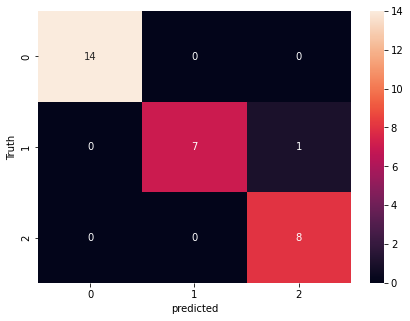

In [206]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

# Classification Report

In [207]:
from sklearn.metrics import classification_report

In [209]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      1.00      0.93         7
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



# Accuracy = TP+TN/TP+FP+FN+TN

# Precision = TP/TP+FP

# Recall = TP/TP+FN

# F1 Score = 2*(Recall * Precision) / (Recall + Precision)

# Decision Tree Algorithm
* Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.
* The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. 
* A tree can be seen as a piecewise constant approximation.

In [44]:
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

In [11]:
#df = pd.read_csv("salaries.csv")

# label Encoding
converting the labels into numeric form

In [46]:
 # loading the label encoding function 

In [47]:
label_encoder = LabelEncoder()

In [48]:
labels = label_encoder.fit_transform(df.company)
df['company_n']=labels 

In [49]:
labels = label_encoder.fit_transform(df.job)
df['job_n']=labels 

In [50]:
labels = label_encoder.fit_transform(df.company)
df['degree_n']=labels 

In [52]:
df.head()

,company,job,degree,salary_more_then_100k,company_n,job_n,degree_n
0,google,sales executive,bachelors,0,2,2,2
1,google,sales executive,masters,0,2,2,2
2,google,business manager,bachelors,1,2,0,2
3,google,business manager,masters,1,2,0,2
4,google,computer programmer,bachelors,0,2,1,2


In [53]:
#splitting the data into x and y
x = df.drop(columns=['salary_more_then_100k'])
y = df['salary_more_then_100k']

In [55]:
x = df.drop(columns=['company','job','degree','salary_more_then_100k'])

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [61]:
clf = tree.DecisionTreeClassifier()

In [62]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [63]:
clf.score(x_test,y_test)

0.75

In [64]:
clf.predict([[2,0,2]])

array([1])

# RandomForest Algorithm
* A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.



In [65]:
# Loading digits dataset from sklearn
from sklearn.datasets import load_digits
digits= load_digits()

In [66]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

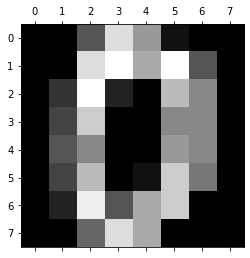

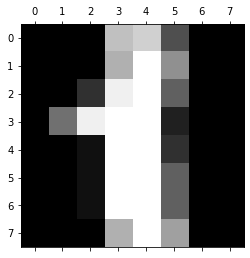

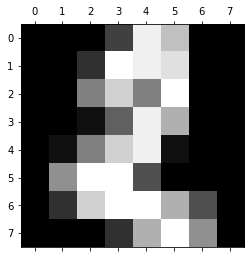

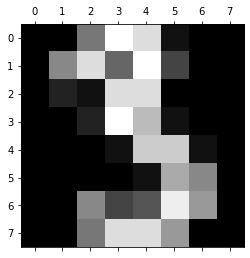

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [68]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [69]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


# Adding the target

In [70]:
df['target']=digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [71]:
# splitting x and y futures and targets
x = df.drop(columns=['target'], axis=1)
y = df['target']

In [74]:
x.shape,y.shape

((1797, 64), (1797,))

# Splitting the data into Training  and Testing data

In [75]:
from sklearn.model_selection import train_test_split 

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

# Model Training 

In [79]:
from sklearn.ensemble import RandomForestClassifier


In [80]:
model = RandomForestClassifier()

In [81]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
model.score(x_test,y_test)

0.9694444444444444

In [83]:
y_predicted = model.predict(x_test)

In [84]:
from sklearn.metrics import confusion_matrix

# Building confusion_matrix

In [85]:
cm = confusion_matrix(y_test,y_predicted)
cm

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  2,  0,  0],
       [ 0,  0,  0,  0, 44,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 29,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 28,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 35,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  1,  0, 28]])

Text(69.0, 0.5, 'truth')

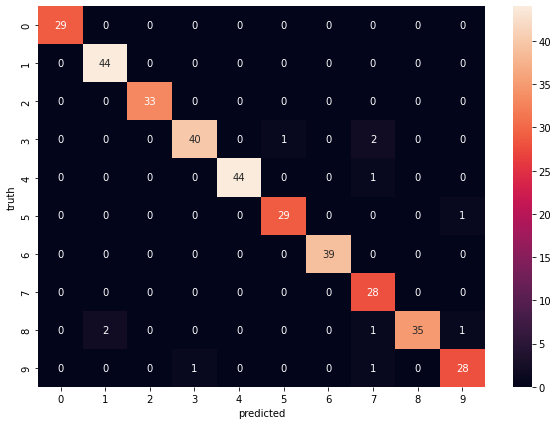

In [86]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

# There are different ways to perform Training step

option 1

* use all available data for training and test on same dataset

option 2

* Split available dataset into training and test sets [train_test_split Method]
*The train_test_split() method is used to split our data into train and test sets. 

*First, we need to divide our data into features (X) and labels (y). The dataframe gets divided into X_train,X_test , y_train and y_test. X_train and y_train sets are used for training and fitting the model. The X_test and y_test sets are used for testing the model if it’s predicting the right outputs/labels. we can explicitly test the size of the train and test sets. It is suggested to keep our train sets larger than the test sets.



option 3

* K fold Cross Validation



# K-Folds cross-validation

* Many times we will think of which machine learning model should we use for a given problem
* kFold-Cross Validation allows us to evaluate performance of a model by creating K Fold of given dataset.
* This is better then doing train_test_split.

we'll Look
* Cross Validation
* kfold
* cross_val_score function 

# By using above digits dataset we'll perform K-Fold Cross validation
 
BY using 3 models:-
* LinearRegression
* Support Vector machine
* RandomForestClssifier

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [89]:
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9527777777777777

In [90]:
model = SVC()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9805555555555555

In [91]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9694444444444444

# Know using K-Fold cross validation

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
cross_val_score(LogisticRegression(), digits.data, digits.target)

array([0.92222222, 0.86944444, 0.94150418, 0.93871866, 0.89693593])

In [94]:
cross_val_score(SVC(), digits.data, digits.target)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [95]:
cross_val_score(RandomForestClassifier(n_estimators=50), digits.data, digits.target)

array([0.90833333, 0.88888889, 0.95543175, 0.94428969, 0.91922006])

# K-Means Clustering.

* K-means is an unsupervised learning method for clustering data points. The algorithm iteratively divides data points into K clusters by minimizing the variance in each cluster.

* Here, we will show you how to estimate the best value for K using the elbow method, then use K-means clustering to group the data points into cluste

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [8]:
df = pd.read_csv('income.csv')
df.head()

NameError: name 'pd' is not defined

In [9]:
plt.scatter(df['Age'],df['Income($)'])

NameError: name 'plt' is not defined

In [10]:
from sklearn.cluster import KMeans

In [11]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

NameError: name 'df' is not defined

In [101]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [102]:
x = df.drop(columns=['cluster'], axis=1)
y = df['cluster']

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


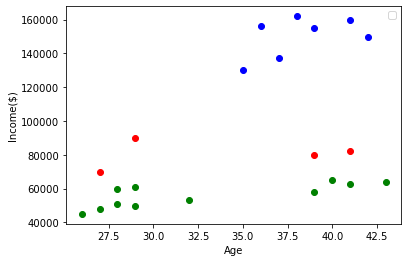

In [103]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='red')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [104]:
df.shape

(22, 4)

In [105]:
scaler =MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [106]:
scaler =MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [107]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [108]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [109]:
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

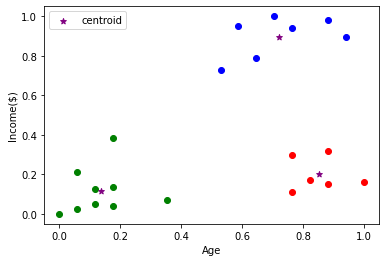

In [110]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='blue')
plt.scatter(df3.Age,df3['Income($)'],color='red')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'purple',marker='*',label='centroid')
plt.legend()

# Elbow Plot Method

# km.inertia:-
* Inertia measures how well a dataset was clustered by K-Means.
* It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
* A good model is one with low inertia AND a low number of clusters ( K )

In [ ]:
# The SSE is defined as the sum of the squared Euclidean distances of each point to its closest centroid.
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [112]:
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.2187801089333045,
 0.17299621932455464,
 0.13762504146528043,
 0.10188787724979427]

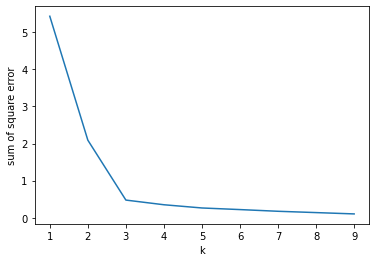

In [113]:
plt.xlabel('k')
plt.ylabel('sum of square error')
plt.plot(k_rng,sse)

# Hierarchical clustering
* Hierarchical clustering is a general family of clustering algorithms that build nested clusters by merging or splitting them successively.

* This hierarchy of clusters is represented as a tree (or dendrogram).

* The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample

In [114]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster .hierarchy as sch

In [115]:
datasubset = df.loc[:,["Age","Income($)"]]

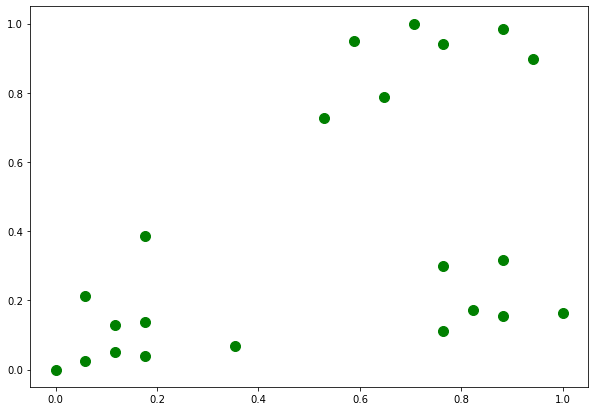

In [116]:
plt.figure(figsize=(10,7))
plt.scatter(datasubset[["Age"]], datasubset[["Income($)"]],s=100,c='green')

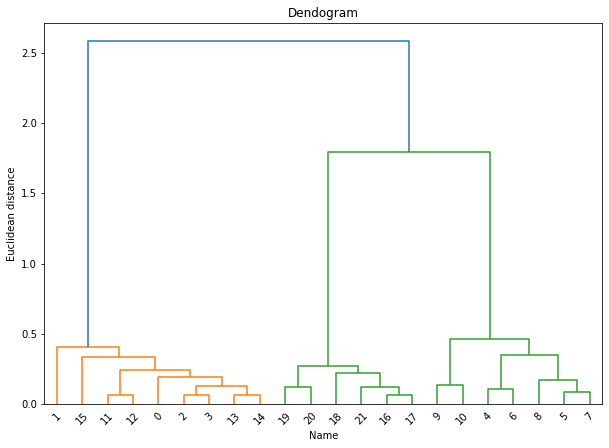

In [117]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

dendrogram = sch.dendrogram(sch.linkage(datasubset,method = "ward"))
plt.title("Dendogram")
plt.xlabel("Name")
plt.ylabel("Euclidean distance")
plt.show()
# check for largest distance vertically with crossing any horizontal line

In [123]:
cluster = AgglomerativeClustering(n_clusters = 3, affinity = "euclidean", linkage = "ward")
cluster.fit_predict(datasubset)

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [124]:
cl = cluster.fit_predict(datasubset)

# silhouette score

* The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.

In [125]:
from sklearn.metrics import silhouette_score

In [126]:
silhouette_score(datasubset,cl)

0.7129710183539274

# Naïve Bayes Classifier Algorithm
* supervised learning algorithm
* It is mainly used in text classification that includes a high-dimensional training dataset.
* It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
* Some popular examples are spam filtration, Sentimental analysis, and classifying articles.
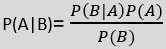
 

In [874]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [875]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [876]:
target =df.Survived
inputs = df.drop('Survived',axis='columns')

In [877]:
dumies = pd.get_dummies(inputs.Sex)
dumies.head(3)

,female,male
0,0,1
1,1,0
2,1,0


In [878]:
inputs = pd.concat([inputs,dumies],axis='columns')
inputs.head(3)

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0


In [879]:
inputs.drop('Sex',axis='columns',inplace=True)
inputs.head(3)

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0


# Finding Null Values

In [880]:
inputs.columns[inputs.isnull().any()]

Index(['Age'], dtype='object')

In [881]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

# we'll Fill NaN values

In [882]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(10)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1
8,3,27.000000,11.1333,1,0
9,2,14.000000,30.0708,1,0


In [883]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(inputs,target,test_size=0.3)

In [884]:
len(x_train)

623

In [885]:
len(x_test)

268

In [886]:
len(inputs)

891

In [887]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [888]:
model.fit(x_train,y_train)

GaussianNB()

In [889]:
model.score(x_test,y_test)

0.7761194029850746

In [890]:
x_test

,Pclass,Age,Fare,female,male
485,3,29.699118,25.4667,1,0
573,3,29.699118,7.7500,1,0
336,1,29.000000,66.6000,0,1
794,3,25.000000,7.8958,0,1
481,2,29.699118,0.0000,0,1
...,...,...,...,...,...
116,3,70.500000,7.7500,0,1
767,3,30.500000,7.7500,1,0
494,3,21.000000,8.0500,0,1
163,3,17.000000,8.6625,0,1


In [891]:
y_test[:10]

485    0
573    1
336    0
794    0
481    0
412    1
536    0
484    1
764    0
680    0
Name: Survived, dtype: int64

In [892]:
model.predict(x_test[:10])

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [893]:
model.predict_proba(x_test[:10])

array([[0.06167988, 0.93832012],
       [0.06338134, 0.93661866],
       [0.82668321, 0.17331679],
       [0.99016278, 0.00983722],
       [0.97913637, 0.02086363],
       [0.00107095, 0.99892905],
       [0.92888362, 0.07111638],
       [0.58984378, 0.41015622],
       [0.9873299 , 0.0126701 ],
       [0.0634852 , 0.9365148 ]])

#  What is label Encoding?
# converting the labels into numeric form

In [306]:
from sklearn.preprocessing import LabelEncoder

In [307]:
cancer = pd.read_csv('cancer.csv')

In [308]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Finding the count of different labels

In [310]:
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

# load the label encoder function

In [312]:
label_encoder = LabelEncoder()

In [313]:
labels = label_encoder.fit_transform(cancer.diagnosis)

# Appending the Label to the DataFrame

In [315]:
cancer['target']=labels

In [316]:
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


# 0--> Benine

# 1--> Malignant

In [318]:
cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64